In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pydotplus
from IPython.display import Image
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sleep_df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep_df.fillna('None',inplace=True)

In [4]:
#clean data
sleep_df['BMI Category'] = [category if category != 'Normal Weight' else 'Normal' for category in sleep_df['BMI Category']]
sleep_df['Systolic Pressure'] = [int(string[:3]) for string in sleep_df['Blood Pressure']]
sleep_df['Diastolic Pressure'] = [int(string[-2:]) for string in sleep_df['Blood Pressure']]
disorder = sleep_df['Sleep Disorder']
sleep_df.drop(columns=['Blood Pressure','Sleep Disorder','Occupation','Person ID'],inplace=True)

In [474]:
y = disorder.values
X = pd.get_dummies(sleep_df)

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

In [172]:
pd.DataFrame(y).value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [179]:
# Initial model creation
accuracy0 = list()
insomnia_recall0 = list()
none_recall0 = list()
sleep_apnea_recall0 = list()
insomnia_precision0 = list()
none_precision0 = list()
sleep_apnea_precision0 = list()
#confusion matricies
cms0 = list()
feature_importances0 = list()
feature_ratings0 = list()

for i in range(10):
    y = disorder.values
    X = pd.get_dummies(sleep_df)
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=i)

    # Creating the decision tree classifier instance
    model = tree.DecisionTreeClassifier()
    # Fitting the model
    model = model.fit(X_train, y_train)

    # Making predictions using the testing data
    predictions = model.predict(X_test)

    # Create DOT data
    dot_data = tree.export_graphviz(
        model, out_file=None, feature_names=X.columns, class_names=["Insomnia", "None","Sleep Apnea"], filled=True)
    # Draw graph
    graph = pydotplus.graph_from_dot_data(dot_data)
    # Write png
    graph.write_png(f'initial_decision_tree{i}.png')
    
    #Determine most important features for each model
    feature_list = []
    sorted_features = model.feature_importances_
    sorted_features.sort()
    for j in range(5):
        feature_list.append(model.feature_names_in_[np.where(model.feature_importances_ == sorted_features[-1-j])[0][0]])
    feature_importances0.append(feature_list)
    feature_ratings0.append(np.flip(sorted_features[-5:]))
    
    #create lists for data evaluation
    cms0.append(confusion_matrix(y_test, predictions))
    report = classification_report(y_test,predictions,output_dict=True)
    accuracy0.append(report['accuracy'])
    insomnia_recall0.append(report['Insomnia']['recall'])
    none_recall0.append(report['None']['recall'])
    sleep_apnea_recall0.append(report['Sleep Apnea']['recall'])
    insomnia_precision0.append(report['Insomnia']['precision'])
    none_precision0.append(report['None']['precision'])
    sleep_apnea_precision0.append(report['Sleep Apnea']['precision'])




In [166]:
# Final model creation
accuracy = list()
insomnia_recall = list()
none_recall = list()
sleep_apnea_recall = list()
insomnia_precision = list()
none_precision = list()
sleep_apnea_precision = list()
#confusion matricies
cms = list()
feature_importances = list()
feature_ratings = list()

for i in range(10):
    y = disorder.values
    X = pd.get_dummies(sleep_df)
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=i)

    # Creating the decision tree classifier instance
    model = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
    # Fitting the model
    model = model.fit(X_train, y_train)

    # Making predictions using the testing data
    predictions = model.predict(X_test)

    # Create DOT data
    dot_data = tree.export_graphviz(
        model, out_file=None, feature_names=X.columns, class_names=["Insomnia", "None","Sleep Apnea"], filled=True)
    # Draw graph
    graph = pydotplus.graph_from_dot_data(dot_data)
    # Write png
    graph.write_png(f'decision_tree{i}.png')
    
    #Determine most important features for each model
    feature_list = []
    sorted_features = model.feature_importances_
    sorted_features.sort()
    for j in range(5):
        feature_list.append(model.feature_names_in_[np.where(model.feature_importances_ == sorted_features[-1-j])[0][0]])
    feature_importances.append(feature_list)
    feature_ratings.append(np.flip(sorted_features[-5:]))
    
    #create lists for data evaluation
    cms.append(confusion_matrix(y_test, predictions))
    report = classification_report(y_test,predictions,output_dict=True)
    accuracy.append(report['accuracy'])
    insomnia_recall.append(report['Insomnia']['recall'])
    none_recall.append(report['None']['recall'])
    sleep_apnea_recall.append(report['Sleep Apnea']['recall'])
    insomnia_precision.append(report['Insomnia']['precision'])
    none_precision.append(report['None']['precision'])
    sleep_apnea_precision.append(report['Sleep Apnea']['precision'])





In [168]:
# feature importance for all models
#1,2,6,8,9 are approximately the same
pd.DataFrame(feature_importances)


,0,1,2,3,4
0,BMI Category_Normal,Systolic Pressure,Age,Heart Rate,Sleep Duration
1,BMI Category_Normal,Physical Activity Level,Systolic Pressure,Age,Daily Steps
2,BMI Category_Normal,Physical Activity Level,Systolic Pressure,Age,Heart Rate
3,BMI Category_Normal,Physical Activity Level,Age,Systolic Pressure,Sleep Duration
4,BMI Category_Normal,Physical Activity Level,Age,Heart Rate,Systolic Pressure
5,BMI Category_Normal,Physical Activity Level,Age,Systolic Pressure,Daily Steps
6,BMI Category_Normal,Physical Activity Level,Systolic Pressure,Age,Diastolic Pressure
7,BMI Category_Normal,Physical Activity Level,Systolic Pressure,Daily Steps,Age
8,BMI Category_Normal,Physical Activity Level,Systolic Pressure,Age,Heart Rate
9,BMI Category_Normal,Physical Activity Level,Systolic Pressure,Age,Heart Rate


In [191]:
# final classification reports for all models
initial_report_df = pd.DataFrame({'accuracy':accuracy0, 'insomnia_recall':insomnia_recall0,'none_recall':none_recall0,'sleep_apnea_recall':sleep_apnea_recall0,'insomnia_precision':insomnia_precision0,'none_precision':none_precision0,'sleep_apnea_precision':sleep_apnea_precision0})

In [186]:
#initial classification reports
report_df = pd.DataFrame({'accuracy':accuracy, 'insomnia_recall':insomnia_recall,'none_recall':none_recall,'sleep_apnea_recall':sleep_apnea_recall,'insomnia_precision':insomnia_precision,'none_precision':none_precision,'sleep_apnea_precision':sleep_apnea_precision})
report_df

,accuracy,insomnia_recall,none_recall,sleep_apnea_recall,insomnia_precision,none_precision,sleep_apnea_precision
0,0.882979,0.782609,0.940000,0.857143,0.818182,0.921569,0.857143
1,0.904255,0.736842,0.962264,0.909091,0.875000,0.927273,0.869565
2,0.936170,0.842105,0.981818,0.900000,0.941176,0.931034,0.947368
3,0.882979,0.736842,0.948276,0.823529,0.875000,0.916667,0.777778
4,0.936170,0.789474,0.966667,1.000000,0.937500,0.983051,0.789474
5,0.882979,0.866667,0.913793,0.809524,0.722222,0.963636,0.809524
6,0.893617,0.888889,0.948276,0.722222,0.761905,0.932203,0.928571
7,0.882979,0.818182,0.979167,0.750000,0.782609,0.940000,0.857143
8,0.914894,0.823529,0.966667,0.823529,0.875000,0.935484,0.875000
9,0.914894,0.789474,0.961538,0.913043,1.000000,0.925926,0.840000


In [174]:
# average of final classification reports for equivalent models
report_df.loc[[1,2,6,8,9],:].mean()

accuracy                 0.912766
insomnia_recall          0.816168
none_recall              0.964113
sleep_apnea_recall       0.853577
insomnia_precision       0.890616
none_precision           0.930384
sleep_apnea_precision    0.892101
dtype: float64

In [189]:
# average of initial classification reports for equivalent models
initial_report_df.loc[[1,2,6,8,9],:].mean()

accuracy                 0.895745
insomnia_recall          0.838459
none_recall              0.949943
sleep_apnea_recall       0.795844
insomnia_precision       0.819964
none_precision           0.922909
sleep_apnea_precision    0.905931
dtype: float64

In [187]:
# average initial mean for disorder precision and recall
initial_report_df.loc[:,['insomnia_recall','sleep_apnea_recall','insomnia_precision','sleep_apnea_precision']].mean().mean()

0.8367640722990535

In [163]:
# average final mean for disorder precision and recall
report_df.loc[:,['insomnia_recall','sleep_apnea_recall','insomnia_precision','sleep_apnea_precision']].mean().mean()

0.8430713611098

In [177]:
#final minimum disorder classification score for each model 
report_df.loc[:,['insomnia_recall','sleep_apnea_recall','insomnia_precision','sleep_apnea_precision']].min(1)

0    0.782609
1    0.736842
2    0.842105
3    0.736842
4    0.789474
5    0.722222
6    0.722222
7    0.750000
8    0.823529
9    0.789474
dtype: float64

In [176]:
#average confusion matrix
cm_total = np.array([[0,0,0],[0,0,0],[0,0,0]])
for i in range(10):
    cm_total = cm_total + cms[i]
cm_avg = cm_total / 10
cm_avg

array([[15.3,  1.8,  1.9],
       [ 1.4, 52.8,  1. ],
       [ 1.3,  1.7, 16.8]])

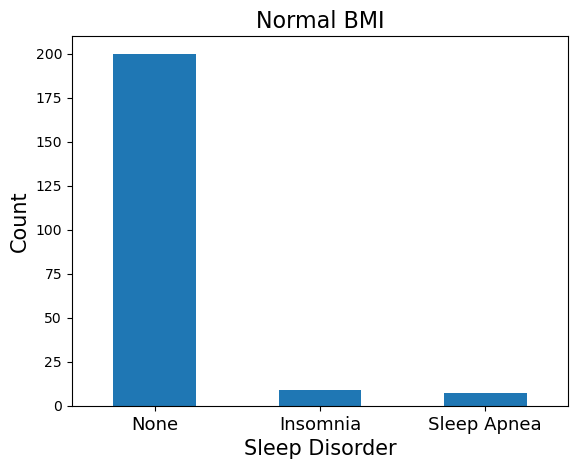

In [193]:
#Make figures to demonstrate how the decision tree divides up the data
# Normal BMI has no disorder
normal_bmi = pd.DataFrame(y[sleep_df['BMI Category'] == 'Normal']).value_counts().plot.bar()
normal_bmi.set_xlabel('Sleep Disorder',fontsize=15)
normal_bmi.set_ylabel('Count',fontsize=15)
normal_bmi.set_xticklabels(['None','Insomnia','Sleep Apnea'],fontsize=13,rotation=0)
normal_bmi.set_title('Normal BMI',fontsize=16)
normal_bmi.figure.savefig('normal_bmi.png')

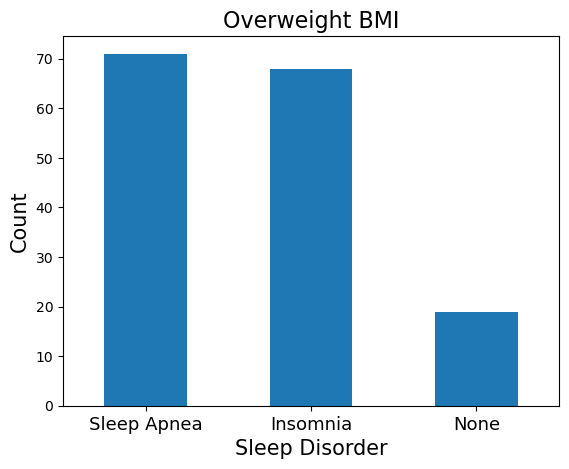

In [195]:
# Overweight has mostly disorder
overweight = pd.DataFrame(y[sleep_df['BMI Category'] != 'Normal']).value_counts().plot.bar()
overweight.set_xlabel('Sleep Disorder',fontsize=15)
overweight.set_ylabel('Count',fontsize=15)
overweight.set_xticklabels(['Sleep Apnea','Insomnia','None'],fontsize=13,rotation=0)
overweight.set_title('Overweight BMI',fontsize=16)
overweight.figure.savefig('overweight.png')

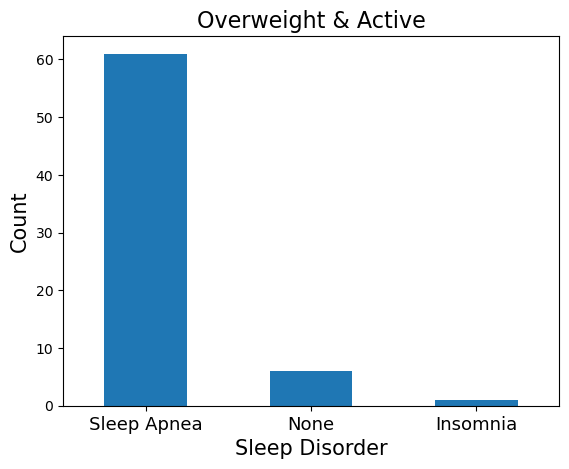

In [196]:
#Determine majority of sleep apnea
ow_active = pd.DataFrame(y[(sleep_df['Physical Activity Level'] > 70) & (sleep_df['BMI Category'] != 'Normal')]).value_counts().plot.bar()
ow_active.set_xlabel('Sleep Disorder',fontsize=15)
ow_active.set_ylabel('Count',fontsize=15)
ow_active.set_xticklabels(['Sleep Apnea','None','Insomnia'],fontsize=13,rotation=0)
ow_active.set_title('Overweight & Active',fontsize=16)
ow_active.figure.savefig('overweight_active.png')

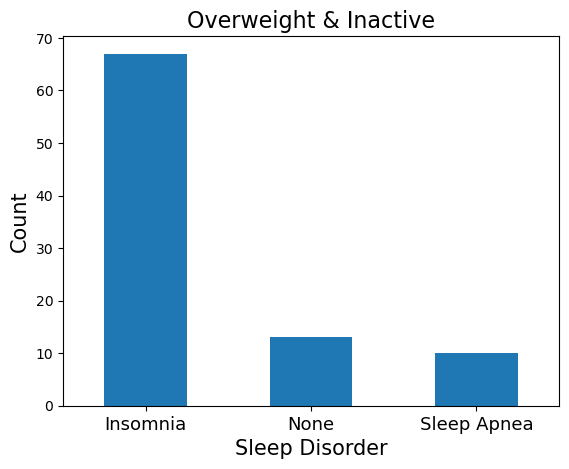

In [197]:
#Determine insomnia
ow_inactive = pd.DataFrame(y[(sleep_df['Physical Activity Level'] <= 70) & (sleep_df['BMI Category'] != 'Normal')]).value_counts().plot.bar()
ow_inactive.set_xlabel('Sleep Disorder',fontsize=15)
ow_inactive.set_ylabel('Count',fontsize=15)
ow_inactive.set_xticklabels(['Insomnia','None','Sleep Apnea'],fontsize=13,rotation=0)
ow_inactive.set_title('Overweight & Inactive',fontsize=16)
ow_inactive.figure.savefig('overweight_inactive.png')

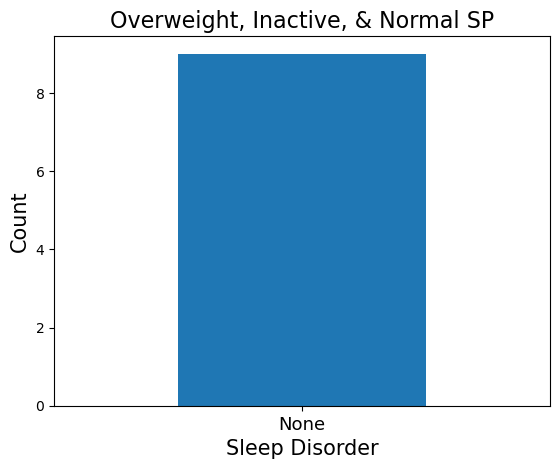

In [198]:
#None separated from above plot
ow_inactive_normal_bp = pd.DataFrame(y[(sleep_df['Physical Activity Level'] <= 70) & (sleep_df['BMI Category'] != 'Normal') & (sleep_df['Systolic Pressure'] <= 128.5)]).value_counts().plot.bar()
ow_inactive_normal_bp.set_xlabel('Sleep Disorder',fontsize=15)
ow_inactive_normal_bp.set_ylabel('Count',fontsize=15)
ow_inactive_normal_bp.set_xticklabels(['None'],fontsize=13,rotation=0)
ow_inactive_normal_bp.set_title('Overweight, Inactive, & Normal SP',fontsize=16)
ow_inactive_normal_bp.figure.savefig('overweight_inactive_normal_bp.png')

<Axes: xlabel='0'>

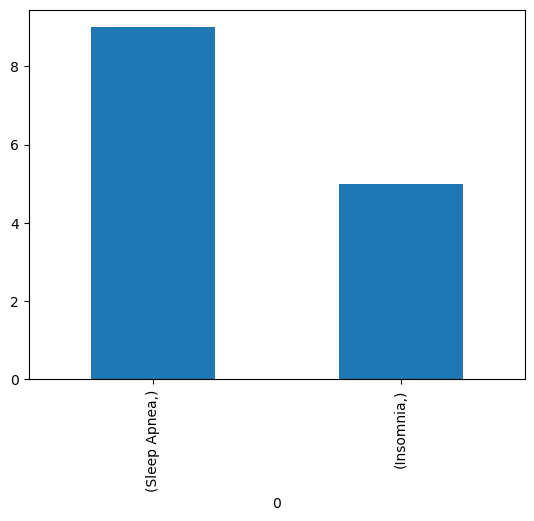

In [681]:
# Separate sleep apnea from insomnia class
#cutoff of 42.5 only works because of most insomnia lying right above 42.5. We expect there to be a much smaller number of women here. Could be conincidence that they have sleep apnea
pd.DataFrame(y[(sleep_df['Physical Activity Level'] <= 70) & (sleep_df['BMI Category'] != 'Normal') & (sleep_df['Systolic Pressure'] > 128.5) & (sleep_df['Age'] <= 42.5)]).value_counts().plot.bar()

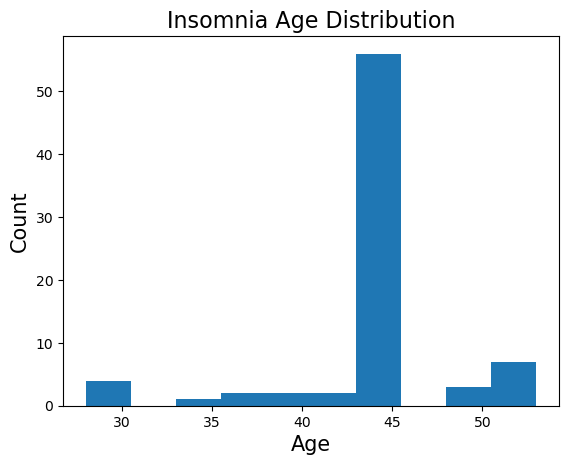

In [200]:
#classification affected by all insomnia age > 42 with many younger individuals with sleep apnea
# misleading to say that younger means more likely to have sleep apnea?
# Can we trust the insomnia distribution as representative?
# What if spread is greater or older people are missing?
insomnia_age = sleep_df.loc[y == 'Insomnia','Age'].plot.hist()#range=[42,46])
insomnia_age.set_xlabel('Age',fontsize=15)
insomnia_age.set_ylabel('Count',fontsize=15)
insomnia_age.set_title('Insomnia Age Distribution',fontsize=16)
insomnia_age.figure.savefig('insomnia_age.png')

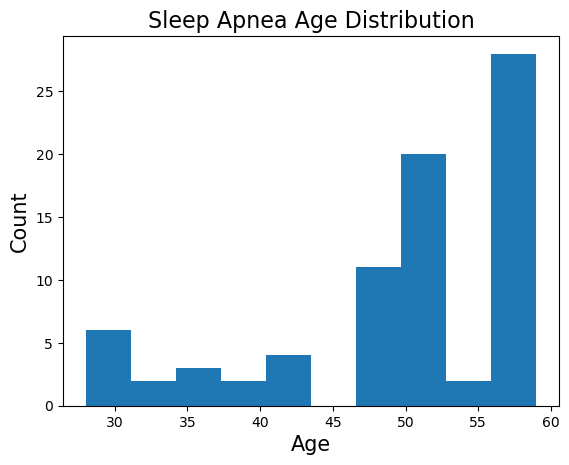

In [201]:
sleep_apnea_age = sleep_df.loc[y == 'Sleep Apnea','Age'].plot.hist()
sleep_apnea_age.set_xlabel('Age',fontsize=15)
sleep_apnea_age.set_ylabel('Count',fontsize=15)
sleep_apnea_age.set_title('Sleep Apnea Age Distribution',fontsize=16)
sleep_apnea_age.figure.savefig('sleep_apnea_age.png')

In [245]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000)#,max_depth=3)#,max_samples=100)#,bootstrap=False)

# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [246]:
confusion_matrix(y_test, predictions)


array([[17,  1,  0],
       [ 1, 51,  1],
       [ 2,  1, 20]])

In [247]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1487591879463577, 'Diastolic Pressure'),
 (0.14614803886034422, 'Systolic Pressure'),
 (0.14541553970469856, 'BMI Category_Normal'),
 (0.1141592271588242, 'Age'),
 (0.11065353205452581, 'Sleep Duration'),
 (0.0804625247314384, 'BMI Category_Overweight'),
 (0.06521466175303957, 'Physical Activity Level'),
 (0.05192395365451735, 'Daily Steps'),
 (0.04794551046758253, 'Heart Rate'),
 (0.03418253066127404, 'Stress Level'),
 (0.030900378705901607, 'Quality of Sleep'),
 (0.010405339934808069, 'Gender_Female'),
 (0.009767396460257545, 'Gender_Male'),
 (0.00406217790643043, 'BMI Category_Obese')]

In [ ]:
# Scale data
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [82]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

# Train the model
model.fit(X_train_scaled, y_train)

# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array(['None', 'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'None',
       'Insomnia', 'None', 'None', 'None', 'None', 'None', 'Sleep Apnea',
       'None', 'None', 'Sleep Apnea', 'Sleep Apnea', 'None', 'None',
       'None', 'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'None', 'None',
       'None', 'None', 'Insomnia', 'None', 'None', 'Sleep Apnea',
       'Insomnia', 'Insomnia', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'Sleep Apnea',
       'None', 'None', 'None', 'None', 'None', 'Insomnia', 'Sleep Apnea',
       'None', 'None', 'Insomnia', 'None', 'None', 'None', 'None', 'None',
       'Insomnia', 'Sleep Apnea', 'None', 'Sleep Apnea', 'None',
       'Sleep Apnea', 'None', 'None', 'None', 'Sleep Apnea', 'None',
       'Sleep Apnea', 'None', 'None', 'Sleep Apnea', 'None', 'None',
       'None', 'Sleep Apnea', 'None', 'Insomnia', 'None', 'None',
       'Insomnia', 'None', 'Insomnia', 'None', 'None', 'None', 'None',
       'Sleep Apnea', '

In [83]:
confusion_matrix(y_test,y_pred)

array([[11,  7,  1],
       [ 0, 52,  2],
       [ 1,  5, 15]])